In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os 
import csv
import sys
from PIL import Image

In [2]:
face_cascade = cv2.CascadeClassifier('Train/third-party/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier("Train/third-party/frontalEyes35x16.xml")
nose_cascade = cv2.CascadeClassifier("Train/third-party/Nose18x15.xml")

In [3]:
img = cv2.imread("Test/Before.png")
# glasses = cv2.imread("Train/glasses.png")
# mustache = cv2.imread("Train/mustache.png")


background = Image.open("Test/Before.png")
glasses = Image.open("Train/glasses.png")
mustache = Image.open("Train/mustache.png")

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [5]:
for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

In [6]:
eyes = eye_cascade.detectMultiScale(roi_gray)
for (ex,ey,eh,ew) in eyes:
    
    
    glasses = glasses.resize((ew,eh), Image.ANTIALIAS)
    
    offset = (ex,ey)
    
    
    background.paste(glasses, offset, glasses)
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

In [7]:
nose = nose_cascade.detectMultiScale(roi_gray)
for (nx,ny,nw,nh) in nose:
    
    mustache = mustache.resize((nw,nh), Image.ANTIALIAS)
    
    offset = (nx,ny)
    
    background.paste(mustache, offset, mustache)
    cv2.rectangle(roi_color,(nx,ny),(nx+nw,ny+nh),(0,255,255),2)

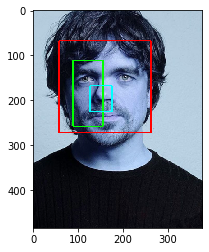

In [8]:
plt.imshow(img)
plt.show()

In [9]:
background.show()

In [10]:
# for (x,y,w,h) in faces:

# 	# just to show detected faces
# 	cv2.rectangle(image, (x,y), (x+w, y+h), (255, 0, 0), 2)
# 	cv2.imshow('face detected', image)
# 	cv2.waitKey(0)

# 	# open mask as PIL image
# 	mask = Image.open(maskPath)
# 	# resize mask according to detected face
# 	mask = mask.resize((w,h), Image.ANTIALIAS)

# 	# define offset for mask
# 	offset = (x,y)
# 	# paste mask on background
# 	background.paste(mask, offset, mask=mask)

# # paste final thug life meme
# background.save('out.png')